# Welcome to Lab Session 8 - Derek Thomas - 11Nov2017

## Define & setup the environment

In [1]:
import pandas as pd
import numpy as np
#import pandas_datareader as pdr
#from pandas_datareader import data, wb
#import urllib3
#http = urllib3.PoolManager()
import string
import re
import json
#from collections import OrderedDict
import warnings
warnings.filterwarnings('ignore')

## Import various Datasets to be used in SCU MSIS Dashboard

### Dataset-1 is a list of 50 Best for Jobs in America for 2017 compiled by Glassdoor
Reference: https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm

Raw Dataset-1 prior to scraping:

![50-Best-Jobs-2017_Raw.png](attachment:50-Best-Jobs-2017_Raw.png)

Dataset-1 utilizing Excel formulas as a means to scrape raw data and capure Dataset-1:

![50-Best-Jobs-2017_Scrape-1.png](attachment:50-Best-Jobs-2017_Scrape-1.png)
    
    

Dataset-1 Final result after Excel Scraping

![50-Best-Jobs-2017_Final-1.png](attachment:50-Best-Jobs-2017_Final-1.png)

#### Dataset-1 - Read in "50 Best Jobs in 2017"

In [3]:
dfJobs = pd.read_excel('50-Best-Jobs-2017.xlsx', sheetname='Final', header=0)
dfJobs.head(4)

,Ranking,Occupation,Job Score,Job Satisfaction,Median Base Salary,Job Openings
0,1,Data Scientist,4.8,4.4,110000,4184
1,2,DevOps Engineer,4.7,4.2,110000,2725
2,3,Data Engineer,4.7,4.3,106000,2599
3,4,Tax Manager,4.7,4.0,110000,3317


#### Add new column as Primary Key and reset index to this new column - 'Occuptation ID'

In [4]:
dfJobs['Occupation ID'] = ''
i = 0
for row in dfJobs['Ranking']:
    if (i < 9):
        dfJobs['Occupation ID'][i] = ('OCC_0' + str(i+1))
    else:
        dfJobs['Occupation ID'][i] = ('OCC_' + str(i+1))
    i = i + 1
dfJobs = dfJobs.set_index('Occupation ID')
dfJobs.head(4)

,Ranking,Occupation,Job Score,Job Satisfaction,Median Base Salary,Job Openings
Occupation ID,,,,,,
OCC_01,1,Data Scientist,4.8,4.4,110000,4184
OCC_02,2,DevOps Engineer,4.7,4.2,110000,2725
OCC_03,3,Data Engineer,4.7,4.3,106000,2599
OCC_04,4,Tax Manager,4.7,4.0,110000,3317


### Dataset-2 and Dataset 3 are SCUs MSIS Specialization Tracks and associated Course listings
Reference: https://www.scu.edu/business/ms-information-systems/curriculum/specialization-tracks/

Raw Datasets 2 & 3 prior to scraping:

![SCU-MSIS-Tacks_Raw.png](attachment:SCU-MSIS-Tacks_Raw.png)

Dataset-1 Final result after Excel Scraping

![SCU-MSIS-Tacks_Final.png](attachment:SCU-MSIS-Tacks_Final.png)

#### Dataset-2 - Read in "SCU MSIS Specialization Tracks"

In [5]:
dfTracks = pd.read_excel('SCU-MSIS-Curriculum.xlsx', sheetname='Tracks', header=0)
dfTracks.head(4)

,Track ID,MSIS Specialization Track
0,100,Business Intelligence / Analytics Track
1,200,Enterprise Computing Track
2,300,Mobile Programming Track
3,400,Computer Security Track


#### Dataset-3 - Read in "SCU MSIS Courses"

In [6]:
dfCourses = pd.read_excel('SCU-MSIS-Curriculum.xlsx', sheetname='Courses', header=0)
dfCourses.head(4)

,Track ID,Course ID,Course Description
0,100,MSIS 2621,Business Intelligence and Data Warehousing
1,100,MSIS 2627,Big Data Modeling and Analytics
2,100,MSIS 2629,"Dashboards, Scorecards, and Visualization"
3,100,MSIS 2630,Web Programming


#### Assign School name to SCU courses as "Santa Clara University"

In [7]:
dfCourses2 = dfCourses.copy()
dfCourses2['College_University'] = dfCourses['Track ID'].map(lambda x: 'Santa Clara University' if x > 0 else "")
dfCourses2.head(4)

,Track ID,Course ID,Course Description,College_University
0,100,MSIS 2621,Business Intelligence and Data Warehousing,Santa Clara University
1,100,MSIS 2627,Big Data Modeling and Analytics,Santa Clara University
2,100,MSIS 2629,"Dashboards, Scorecards, and Visualization",Santa Clara University
3,100,MSIS 2630,Web Programming,Santa Clara University


#### Assign an Occupation ID to eeach SCU MSIS Course based on external file containing Matrix Mapping

In [8]:
dfOccMatrix = pd.read_excel('D3_COURSE-OCCUPATION.xlsx', sheetname='MAIN', header=0)
dfOccMatrix.head(4)

,Track ID,Course ID,Occupation ID
0,100,MSIS 2621,OCC_07
1,100,MSIS 2627,OCC_05
2,100,MSIS 2629,OCC_05
3,100,MSIS 2630,OCC_26


In [9]:
dfCourses2['Occupation ID'] = dfOccMatrix['Occupation ID']
dfCourses2.head(4)

,Track ID,Course ID,Course Description,College_University,Occupation ID
0,100,MSIS 2621,Business Intelligence and Data Warehousing,Santa Clara University,OCC_07
1,100,MSIS 2627,Big Data Modeling and Analytics,Santa Clara University,OCC_05
2,100,MSIS 2629,"Dashboards, Scorecards, and Visualization",Santa Clara University,OCC_05
3,100,MSIS 2630,Web Programming,Santa Clara University,OCC_26


### Dataset-4 - College Scorecard, Department of Education, ED.gov, 2015-2016 Dataset
Reference: https://catalog.data.gov/dataset/college-scorecard

#### Dataset-4 - Read in "College Scorecard" data from provided .csv file

In [10]:
dfScorecard = pd.read_csv('MERGED2015_16_PP.csv', header=0)
dfScorecard.head(4)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D150_L4_WHITENH,D150_L4_BLACKNH,D150_L4_API,D150_L4_AIANOLD,D150_L4_HISPOLD,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,NaN,NaN,NaN,NaN,NaN,4210.0,2.0,NaN,1123.0,SACSCC
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,NaN,NaN,NaN,NaN,NaN,11679.0,2.0,242.0,6822.0,SACSCC
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,NaN,NaN,279.0,1.0,NaN,319.0,SACSCC
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,NaN,NaN,NaN,NaN,NaN,5618.0,2.0,184.0,1853.0,SACSCC


Filter Scorecard Daset to only include "Masters Colleges & Universities" (CCBASIC = 18), "Main Campus" colleges (MAIN = 1), and "California Universities" (STAABBR = CA) in order to compare only California Santa Universities to similar format Colleges & Universities.

In [11]:
dfScorecard2 = dfScorecard[((dfScorecard['CCBASIC'] == 18) & (dfScorecard['MAIN'] == 1) & (dfScorecard['STABBR'] == 'CA'))]
dfScorecard2.head(4)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D150_L4_WHITENH,D150_L4_BLACKNH,D150_L4_API,D150_L4_AIANOLD,D150_L4_HISPOLD,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE
220,110361,112500,1125,California Baptist University,Riverside,CA,92504-3297,Western Association of Schools and Colleges Se...,www.calbaptist.edu,https://calbaptist.studentaidcalculator.com/we...,...,NaN,NaN,NaN,NaN,NaN,6435.0,2.0,26.0,1911.0,WASCSR
224,110413,113300,1133,California Lutheran University,Thousand Oaks,CA,91360-2787,Western Association of Schools and Colleges Se...,www.callutheran.edu/,https://www.callutheran.edu/financial-aid/tuit...,...,NaN,NaN,NaN,NaN,NaN,2808.0,2.0,8.0,1316.0,WASCSR
225,110422,114300,1143,California Polytechnic State University-San Lu...,San Luis Obispo,CA,93407,Western Association of Schools and Colleges Se...,calpoly.edu,www.csumentor.edu/finaid/pais/,...,NaN,NaN,NaN,NaN,NaN,19246.0,2.0,77.0,895.0,WASCSR
227,110486,799300,7993,California State University-Bakersfield,Bakersfield,CA,93311-1099,Western Association of Schools and Colleges Se...,www.csub.edu,www.csumentor.edu/finaid/pais/,...,NaN,NaN,NaN,NaN,NaN,7635.0,2.0,40.0,1120.0,WASCSR


### Dataset-5 - Money Magazine's "Best Colleges for your Money 2017"
Reference: https://www.scu.edu/business/news/top-stories/leavey-school-ranked-10-in-the-country-for-undergraduate-business-by-money-magazine.html

Raw Dataset-5 as HTML prior to scraping:

![BestColleges.png](attachment:BestColleges.png)

Dataset-5 after Excel scraping:

![BestCollegesExcel.png](attachment:BestCollegesExcel.png)

#### Dataset-5 - Read in Money Magazine's 50 Best Colleges for 2017" data from Excel file

In [12]:
dfBestColleges = pd.read_excel('BestColleges_2017.xlsx', header=0)
dfBestColleges.head(4)

,Order,College Name,City and State,Money Ranking,Median SAT/ACT score,Est. price 2017-18 without aid,Est. price 2017-18 with avg. grant,% who get need-based grants,% who get merit grants,Business major early career earnings
0,1.0,University of California-Berkeley,"Berkeley, CA",4.0,1370/32,37220.0,17929.0,0.48,0.01,72100.0
1,2.0,Washington and Lee University,"Lexington, VA",16.0,1390/32,65737.0,23089.0,0.41,0.10,60000.0
2,3.0,University of Pennsylvania,"Philadelphia, PA",27.0,1460/33,71074.0,25838.0,0.47,NaN,69200.0
3,4.0,Brown University,"Providence, RI",34.0,1440/32,69809.0,24794.0,0.44,NaN,64100.0


## The 5 Datasets are ready for Tableau
1. D1_50BestJobs2017.csv
2. D2_SCUMSISTracks.csv
3. D3_SCUMSISCourses.csv
4. D4_CollegeScorecard201516.csv
5. D5_50BestColleges2017.csv

### Write Dataframes to .csv files

In [13]:
dfJobs.to_csv('D1_50BestJobs2017.csv', encoding='utf-8')
dfTracks.to_csv('D2_SCUMSISTracks.csv', encoding='utf-8')
dfCourses2.to_csv('D3_SCUMSISCourses.csv', encoding='utf-8')
dfScorecard2.to_csv('D4_CollegeScorecard201516.csv', encoding='utf-8')
dfBestColleges.to_csv('D5_50BestColleges2017.csv', encoding='utf-8')

### Data (Evidence)

- D1_50BestJobs2017.csv - Dataset contains the 50 top job occupations for 2017

---------------------------------
- D2_SCUMSISTracks.csv - Dataset contains the Santa Clara University MSIS program main concentration Tracks

---------------------------------
- D3_SCUMSISCourses.csv - Dataset contains the Santa Clara University MSIS curriculum offered as of Oct 2017

---------------------------------
- D4_CollegeScorecard201516.csv - Dataset contains a comprehensive listing of all Colleges/Universities and various statistics

---------------------------------
- D5_50BestColleges2017.csv - Dataset contains the top 50 U.S. Colleges/Universities for Business Majors


### Original Submission from Lab Session 5

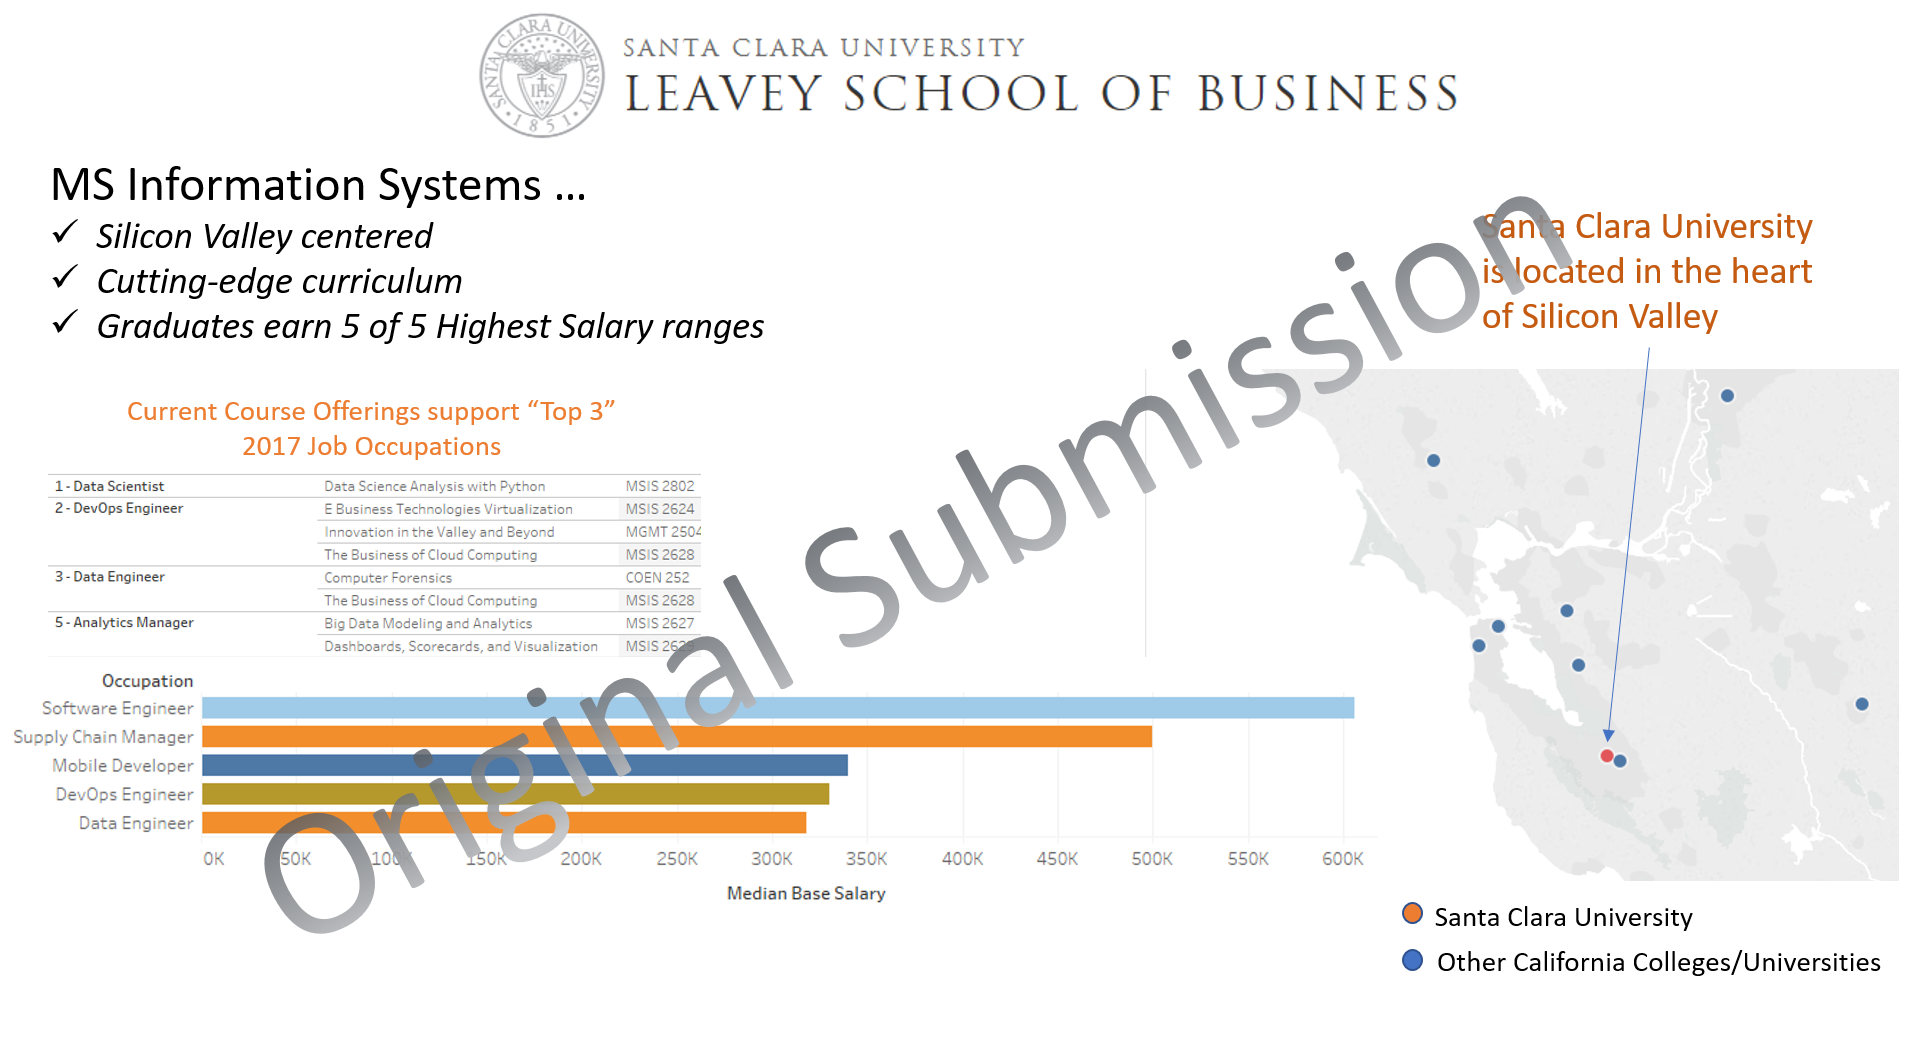

In [20]:
from IPython.display import Image
Image("original-submission.png")

### Lab Session 5 Critique:

- Lacks documentation (Instructor critique)
- Lacks References (Instructor critique)
- Scale of the “Salary” visualization contained error and also can be modified to better fit the values of the data range
- “Map” visualization needs better geographic identification for those not familiar with where “Silicon Valley” is located
- Current visualizations are “Student” audience centered, so the addition of a “Recruiter” audience centered illustration could compliment the final product
- More clearly defined metrics matching the Needs/Fears of the target audiences

### Santa Clara University MSIS program Fact Sheet:

- Santa Clara University is located in the heart of Silicon Valley
- SCUs MSIS program offers 4 Specialization Tracks:
- Business Intelligence/Analytics
- Enterprise Computing
- Mobile Computing
- Computer Security
- SCUs MSIS curriculum directly supports the “Top-3” of the 50 Best Jobs in America for 2017, as reported by Glassdoor.com
- SCUs MSIS Program is Science, Technology, Engineering and Mathematics (STEM) approved
- SCUs MSIS program offers Scholarships to qualified Students
- SCUs MSIS program can be completed under either a Part-Time or Full-Time course of study
- SCUs MSIS program is composed of 30 Units of Core Knowledge components
- SCUs MSIS program is composed of 21 Units of Specialization & Capstone study


### Targeted Audience for Visualization (Per Lab Session 4 Requirements):

==========================================================================
Prospective Students

Needs
- Quality Education
- Assurances that program will lead to relevant job upon completion
- Affordability
- Living arrangements
- Location

Wants
- Favorable Location
- Scholarships

Fears
- Cost/Affordability
- Acceptance into program
- Academic Performance

==========================================================================-

Recruiters

Needs
- Prospective Graduates
- Meet Hiring Quotas
- Compile Contact Lists

Wants
- Large qualified applicant pool

Fears
- Placing unsuitable applicant
- Not meeting quotas

### MSIS Program Metrics & Rankings:

Metrics:
1. Location within 50 miles of Silicon Valley
2. Percentage of curriculum that is Science, Technology, Engineering, and Mathematics (STEM) Approved = 100%
3. Percentage of MSIS Specialization Tracks supporting top 50 2017 Job Professions greater than 75%
4. Percentage of SCU MSIS graduates who complete at least 5-Years of employment once placed greater than 90%
5. Graduation rate of Year-1 entrants exceeds California University average for similar programs


## New Submission for Lab Session 8 (Tableau file included with submission)

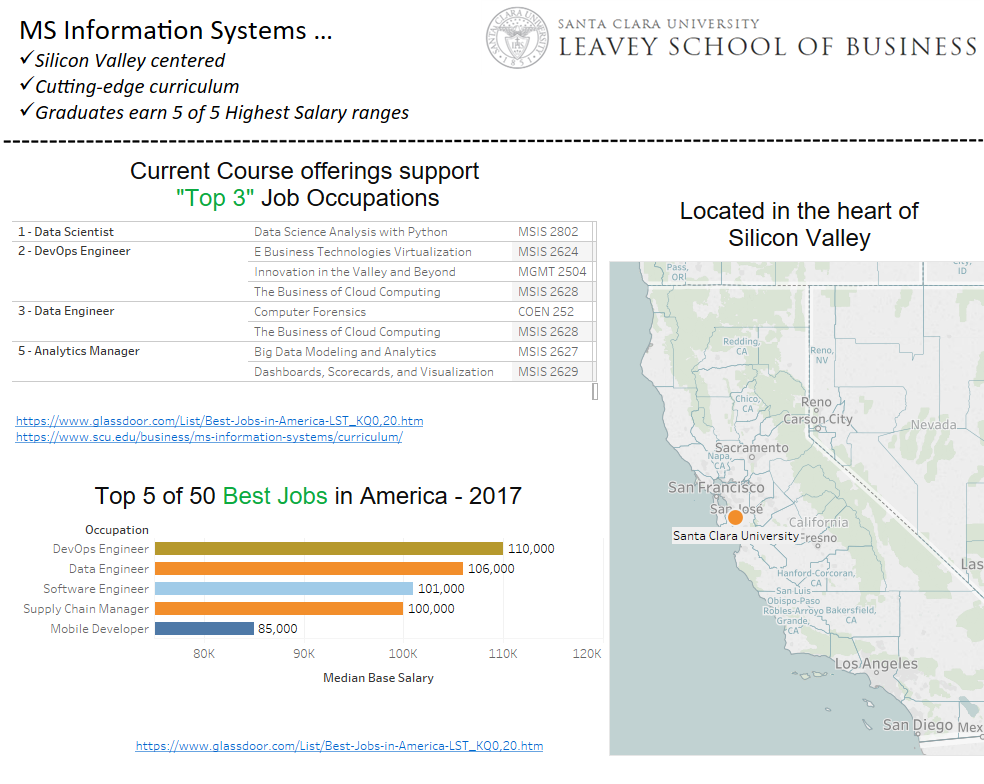

In [23]:
from IPython.display import Image
Image("Lab8-Submission.png")